In [1]:
%load_ext autoreload
%autoreload 2

# Clean Java8 Dataset

In [1]:
from dataset.CodeNet import CodeNet
code_net = CodeNet(location=r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet")

In [2]:
submission_metadata = code_net.get_submission_metadata()
submission_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13916868 entries, 0 to 1088
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   submission_id      string
 1   problem_id         string
 2   user_id            string
 3   date               Int64 
 4   language           string
 5   original_language  string
 6   filename_ext       string
 7   status             string
 8   cpu_time           Int64 
 9   memory             Int64 
 10  code_size          Int64 
 11  accuracy           string
dtypes: Int64(4), string(8)
memory usage: 1.4 GB


In [3]:
accepted_java_submissions = submission_metadata.query("language == 'Java' and status == 'Accepted'")
accepted_java_submissions.groupby(["original_language"]).size().reset_index(name="count").sort_values("count", ascending=False)

,original_language,count
4,Java8 (OpenJDK 1.8.0),194479
0,JAVA,89508
2,Java (OpenJDK 11.0.6),55169
1,Java (OpenJDK 1.8.0),9632
3,Java7 (OpenJDK 1.7.0),6194


In [4]:
accepted_java8_submissions = accepted_java_submissions.query("original_language in ['Java8 (OpenJDK 1.8.0)', 'Java (OpenJDK 1.8.0)']")
accepted_java8_submissions

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
73,s313061017,p02534,u877463638,1601476824,Java,Java (OpenJDK 1.8.0),java,Accepted,99,26976,321,<NA>
158,s688481096,p02534,u360448976,1601432439,Java,Java (OpenJDK 1.8.0),java,Accepted,73,25272,1133,<NA>
199,s691174419,p02534,u006449883,1601422185,Java,Java (OpenJDK 1.8.0),java,Accepted,103,26984,243,<NA>
202,s097798926,p02534,u045535520,1601419234,Java,Java (OpenJDK 1.8.0),java,Accepted,147,26872,221,<NA>
262,s581534922,p02534,u358794223,1601395231,Java,Java (OpenJDK 1.8.0),java,Accepted,90,26632,253,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
2891,s654050958,p04051,u180407835,1468730469,Java,Java8 (OpenJDK 1.8.0),java,Accepted,752,85016,5505,<NA>
2933,s214463615,p04051,u119714109,1468724953,Java,Java8 (OpenJDK 1.8.0),java,Accepted,1098,163756,4964,<NA>
989,s508270000,p04052,u313111801,1483425521,Java,Java8 (OpenJDK 1.8.0),java,Accepted,4394,173360,2032,<NA>
990,s653967260,p04052,u313111801,1483425132,Java,Java8 (OpenJDK 1.8.0),java,Accepted,4492,180560,1910,<NA>


## Filter Outliers

In [5]:
import re
outlier_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\Java\Java_accepted_outliers.txt"
outlier_submission_ids = []
with open(outlier_path, 'r', encoding='utf-8') as file:
    while (line := file.readline().rstrip()):
        submission_id = re.findall(r"s\d{9}", line)[0]
        outlier_submission_ids.append(submission_id)

In [6]:
len(outlier_submission_ids)

11780

In [7]:
java8_outlier_filtered = accepted_java8_submissions.query(f"submission_id not in {outlier_submission_ids}")
java8_outlier_filtered

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
73,s313061017,p02534,u877463638,1601476824,Java,Java (OpenJDK 1.8.0),java,Accepted,99,26976,321,<NA>
158,s688481096,p02534,u360448976,1601432439,Java,Java (OpenJDK 1.8.0),java,Accepted,73,25272,1133,<NA>
199,s691174419,p02534,u006449883,1601422185,Java,Java (OpenJDK 1.8.0),java,Accepted,103,26984,243,<NA>
202,s097798926,p02534,u045535520,1601419234,Java,Java (OpenJDK 1.8.0),java,Accepted,147,26872,221,<NA>
262,s581534922,p02534,u358794223,1601395231,Java,Java (OpenJDK 1.8.0),java,Accepted,90,26632,253,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
2891,s654050958,p04051,u180407835,1468730469,Java,Java8 (OpenJDK 1.8.0),java,Accepted,752,85016,5505,<NA>
2933,s214463615,p04051,u119714109,1468724953,Java,Java8 (OpenJDK 1.8.0),java,Accepted,1098,163756,4964,<NA>
989,s508270000,p04052,u313111801,1483425521,Java,Java8 (OpenJDK 1.8.0),java,Accepted,4394,173360,2032,<NA>
990,s653967260,p04052,u313111801,1483425132,Java,Java8 (OpenJDK 1.8.0),java,Accepted,4492,180560,1910,<NA>


## Filter Duplicate Submissions

In [8]:
import os
dupl_clusters_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\Java\clusters"
cluster_files = os.listdir(dupl_clusters_path)
cluster_dict = {}
cluster_no = 0
cluster_dict[cluster_no] = []
for cluster_file in cluster_files:
    cluster_file_path = f"{dupl_clusters_path}\\{cluster_file}"
    with open(cluster_file_path, 'r', encoding='utf-8') as file:
        while (line := file.readline()):
            line = line.rstrip()
            if (line == ''):
                cluster_no += 1
                cluster_dict[cluster_no] = []
            else:
                submission_id = re.findall(r"s\d{9}", line)[0]
                cluster_dict[cluster_no].append(submission_id)

In [9]:
cluster_dict_filtered = {key:val for key, val in cluster_dict.items() if len(val) > 1}

In [10]:
cluster_dict_removed_submissions = {}
cpp14_outlier_filtered_sub_ids = set(java8_outlier_filtered['submission_id'].values)
for key, value in cluster_dict_filtered.items():
    cluster_dict_removed_submissions[key] = []
    for v in value:
        if v in cpp14_outlier_filtered_sub_ids:
            cluster_dict_removed_submissions[key].append(v)

In [11]:
cluster_dict_filtered_1 = {key:val for key, val in cluster_dict_removed_submissions.items() if len(val) > 1}

In [12]:
import random
duplicate_submission_ids = []
for key, value in cluster_dict_filtered_1.items():
    tmp = value.copy()
    tmp.remove(random.choice(tmp))
    duplicate_submission_ids.extend(tmp)

In [13]:
len(duplicate_submission_ids)

35908

In [14]:
java8_dupl_filtered = java8_outlier_filtered.query(f"submission_id not in {duplicate_submission_ids}")
java8_dupl_filtered

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
73,s313061017,p02534,u877463638,1601476824,Java,Java (OpenJDK 1.8.0),java,Accepted,99,26976,321,<NA>
158,s688481096,p02534,u360448976,1601432439,Java,Java (OpenJDK 1.8.0),java,Accepted,73,25272,1133,<NA>
199,s691174419,p02534,u006449883,1601422185,Java,Java (OpenJDK 1.8.0),java,Accepted,103,26984,243,<NA>
202,s097798926,p02534,u045535520,1601419234,Java,Java (OpenJDK 1.8.0),java,Accepted,147,26872,221,<NA>
262,s581534922,p02534,u358794223,1601395231,Java,Java (OpenJDK 1.8.0),java,Accepted,90,26632,253,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
2891,s654050958,p04051,u180407835,1468730469,Java,Java8 (OpenJDK 1.8.0),java,Accepted,752,85016,5505,<NA>
2933,s214463615,p04051,u119714109,1468724953,Java,Java8 (OpenJDK 1.8.0),java,Accepted,1098,163756,4964,<NA>
989,s508270000,p04052,u313111801,1483425521,Java,Java8 (OpenJDK 1.8.0),java,Accepted,4394,173360,2032,<NA>
990,s653967260,p04052,u313111801,1483425132,Java,Java8 (OpenJDK 1.8.0),java,Accepted,4492,180560,1910,<NA>


## Filter identical problems

In [17]:
java8_dupl_filtered_problem_count = java8_dupl_filtered.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False)
java8_dupl_filtered_problem_count

,problem_id,count
556,p03160,721
557,p03161,674
559,p03163,655
558,p03162,624
159,p02724,535
...,...,...
1319,p03984,1
1318,p03982,1
1317,p03981,1
587,p03191,1


In [20]:
ident_problems_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\identical_problem_clusters"
duplicate_problem_ids = []
with open(ident_problems_path, 'r', encoding='utf-8') as file:
    while (line := file.readline().rstrip()):
        cluster = line.split(',')
        cluster_rows = java8_dupl_filtered_problem_count.query(f"problem_id in {cluster}")
        if not cluster_rows.empty:
            largest_cluster_idx = cluster_rows['count'].idxmax()
            largest_cluster_problem_id = cluster_rows.loc[largest_cluster_idx]['problem_id']
            cluster.remove(largest_cluster_problem_id)
            duplicate_problem_ids.extend(cluster)

In [21]:
len(duplicate_problem_ids)

133

In [22]:
java8_final = java8_dupl_filtered.query(f"problem_id not in {duplicate_problem_ids}")
java8_final

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
73,s313061017,p02534,u877463638,1601476824,Java,Java (OpenJDK 1.8.0),java,Accepted,99,26976,321,<NA>
158,s688481096,p02534,u360448976,1601432439,Java,Java (OpenJDK 1.8.0),java,Accepted,73,25272,1133,<NA>
199,s691174419,p02534,u006449883,1601422185,Java,Java (OpenJDK 1.8.0),java,Accepted,103,26984,243,<NA>
202,s097798926,p02534,u045535520,1601419234,Java,Java (OpenJDK 1.8.0),java,Accepted,147,26872,221,<NA>
263,s795355200,p02534,u358794223,1601395185,Java,Java (OpenJDK 1.8.0),java,Accepted,91,26940,253,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
2891,s654050958,p04051,u180407835,1468730469,Java,Java8 (OpenJDK 1.8.0),java,Accepted,752,85016,5505,<NA>
2933,s214463615,p04051,u119714109,1468724953,Java,Java8 (OpenJDK 1.8.0),java,Accepted,1098,163756,4964,<NA>
989,s508270000,p04052,u313111801,1483425521,Java,Java8 (OpenJDK 1.8.0),java,Accepted,4394,173360,2032,<NA>
990,s653967260,p04052,u313111801,1483425132,Java,Java8 (OpenJDK 1.8.0),java,Accepted,4492,180560,1910,<NA>


In [27]:
java8_final_problem_count = java8_final.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False).query(f"count >= {300}")
java8_final_problem_count

,problem_id,count
553,p03160,721
554,p03161,674
556,p03163,655
555,p03162,624
159,p02724,535
...,...,...
728,p03361,304
986,p03695,304
521,p03126,304
509,p03103,303


In [15]:
java8_dupl_filtered.to_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\java8_w_ident_problems.csv")

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\java8.csv", index_col=0)

In [10]:
problem_ids = df.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False)
problem_ids

,problem_id,count
553,p03160,721
554,p03161,674
556,p03163,655
555,p03162,624
159,p02724,535
...,...,...
728,p03361,304
986,p03695,304
521,p03126,304
509,p03103,303


In [12]:
problem_id_dataset = problem_ids.query(f"count >= {300}").sample(100)
problem_id_dataset

,problem_id,count
256,p02829,327
1249,p04044,411
152,p02717,383
521,p03126,304
340,p02922,412
...,...,...
274,p02847,326
408,p02995,360
454,p03042,433
214,p02783,377


In [13]:
problem_ids_dataset = list(problem_id_dataset['problem_id'].values)

In [14]:
len(problem_ids_dataset)

100

In [19]:
import os
import shutil
target_dir = r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\java8_100_300"
for problem_id in problem_ids_dataset:
    java8_samples = df.query(f'problem_id == "{problem_id}"').sample(300)

    problem_id_trg_dir = os.path.join(target_dir, problem_id)
    os.mkdir(problem_id_trg_dir)

    problem_id_java8_trg_dir = problem_id_trg_dir
    submission_ids = java8_samples["submission_id"].values
    paths = code_net.get_src_paths_of_submissions(list(submission_ids))
    for _, value in paths.items():
        shutil.copy(value, problem_id_java8_trg_dir)

In [20]:
import os
import re
path = r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\java8_100_300"

fname = []
for root,d_names,f_names in os.walk(path):
    for f in f_names:
        fname.append(os.path.join(root, f))
with open(os.path.join(path, "ai4code_input.txt"), "w") as f:
    for fn in fname:
       problem_id = re.findall(r"p\d{5}", fn)[0]
       f.write(fn + " " + path + f"\\ai4code_java\\{problem_id}\\\n")

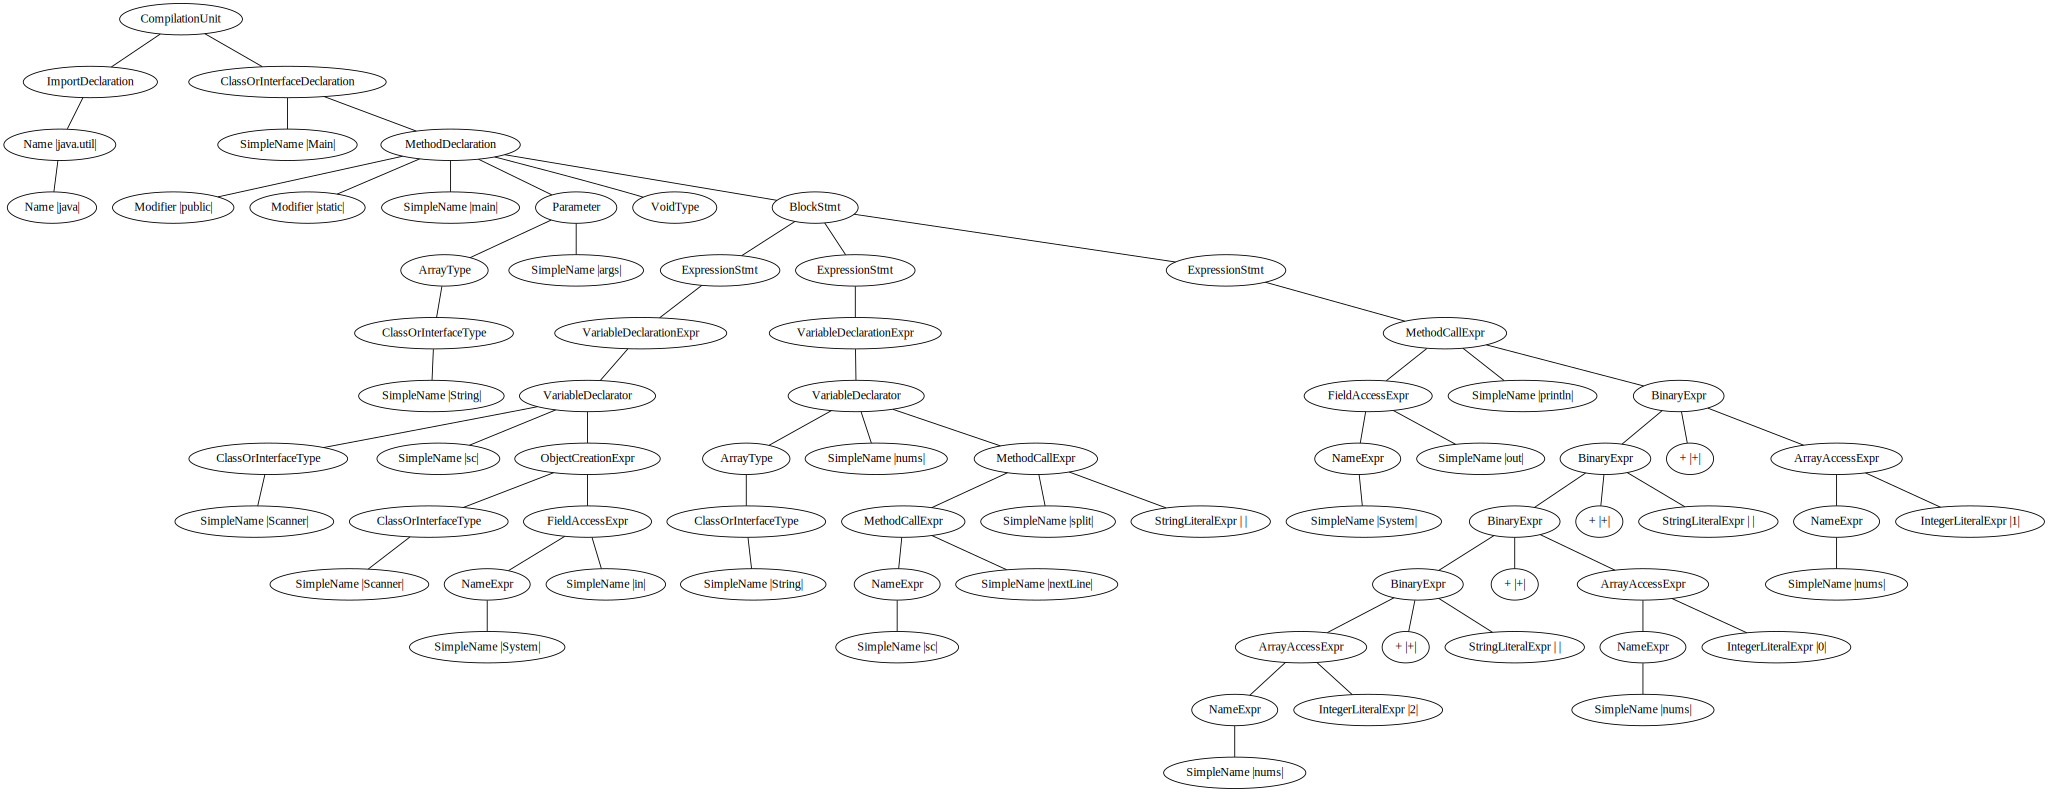

In [28]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\java8_100_300\ai4code_java\p02717\s910292860.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [2]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\java8_100_300\ai4code_problem_class_java", r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\java8_100_300\ai4code_java", 200, 50, 50)

In [30]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02718 ...
... finished p02718
processing p02719 ...
... finished p02719
processing p02723 ...
... finished p02723
processing p02724 ...
... finished p02724
processing p02730 ...
... finished p02730
processing p02731 ...
... finished p02731
processing p02732 ...
... finished p02732
processing p02753 ...
... finished p02753
processing p02754 ...
... finished p02754
processing p02755 ...
... finished p02755
processing p02760 ...
... finished p02760
processing p02761 ...
... finished p02761
processing p02766 ...
... finished p02766
processing p02767 ...
... finished p02767
processing p02771 ...
... finished p02771
processing p02772 ...
... finished p02772
processing p02773 ...
... finished p02773
processing p02783 ...
... finished p02783
processing p02784 ...
... finished p02784
processing p02785 ...
... finished p02785
processing p02790 ...
... finished p02790
processing p02791 ...
... finished p02791
processing p02802 ...
... finished

In [3]:
dataset.get_vocabulary_map()

{'!': 1,
 '!=': 2,
 '%': 3,
 '%=': 4,
 '&': 5,
 '&&': 6,
 '&=': 7,
 '*': 8,
 '*=': 9,
 '+': 10,
 '++': 11,
 '+=': 12,
 '-': 13,
 '--': 14,
 '-=': 15,
 '/': 16,
 '/=': 17,
 '<': 18,
 '<<': 19,
 '<<=': 20,
 '<=': 21,
 '=': 22,
 '==': 23,
 '>': 24,
 '>=': 25,
 '>>': 26,
 '>>=': 27,
 '>>>': 28,
 '>>>=': 29,
 'ArrayAccessExpr': 30,
 'ArrayCreationExpr': 31,
 'ArrayCreationLevel': 32,
 'ArrayInitializerExpr': 33,
 'ArrayType': 34,
 'AssertStmt': 35,
 'AssignExpr': 36,
 'BinaryExpr': 37,
 'BlockStmt': 38,
 'BooleanLiteralExpr': 39,
 'BreakStmt': 40,
 'CastExpr': 41,
 'CatchClause': 42,
 'CharLiteralExpr': 43,
 'ClassExpr': 44,
 'ClassOrInterfaceDeclaration': 45,
 'ClassOrInterfaceType': 46,
 'CompilationUnit': 47,
 'ConditionalExpr': 48,
 'ConstructorDeclaration': 49,
 'ContinueStmt': 50,
 'DoStmt': 51,
 'DoubleLiteralExpr': 52,
 'EmptyStmt': 53,
 'EnclosedExpr': 54,
 'EnumConstantDeclaration': 55,
 'EnumDeclaration': 56,
 'ExplicitConstructorInvocationStmt': 57,
 'ExpressionStmt': 58,
 'Fiel

In [4]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = dataset.get_vocabulary_map()
labels = dataset.get_labels()
model = Tbcnn(feature_size=len(node_map), num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [5]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

20000/20000 [==============================] - 212s 11ms/step - loss: 1.2501 - categorical_accuracy: 0.7132 - precision: 0.9153 - recall: 0.5969 - val_loss: 0.5547 - val_categorical_accuracy: 0.8614 - val_precision: 0.9303 - val_recall: 0.8112


In [6]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

5000/5000 [==============================] - 38s 8ms/step - loss: 0.5514 - categorical_accuracy: 0.8592 - precision: 0.9293 - recall: 0.8102


In [7]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

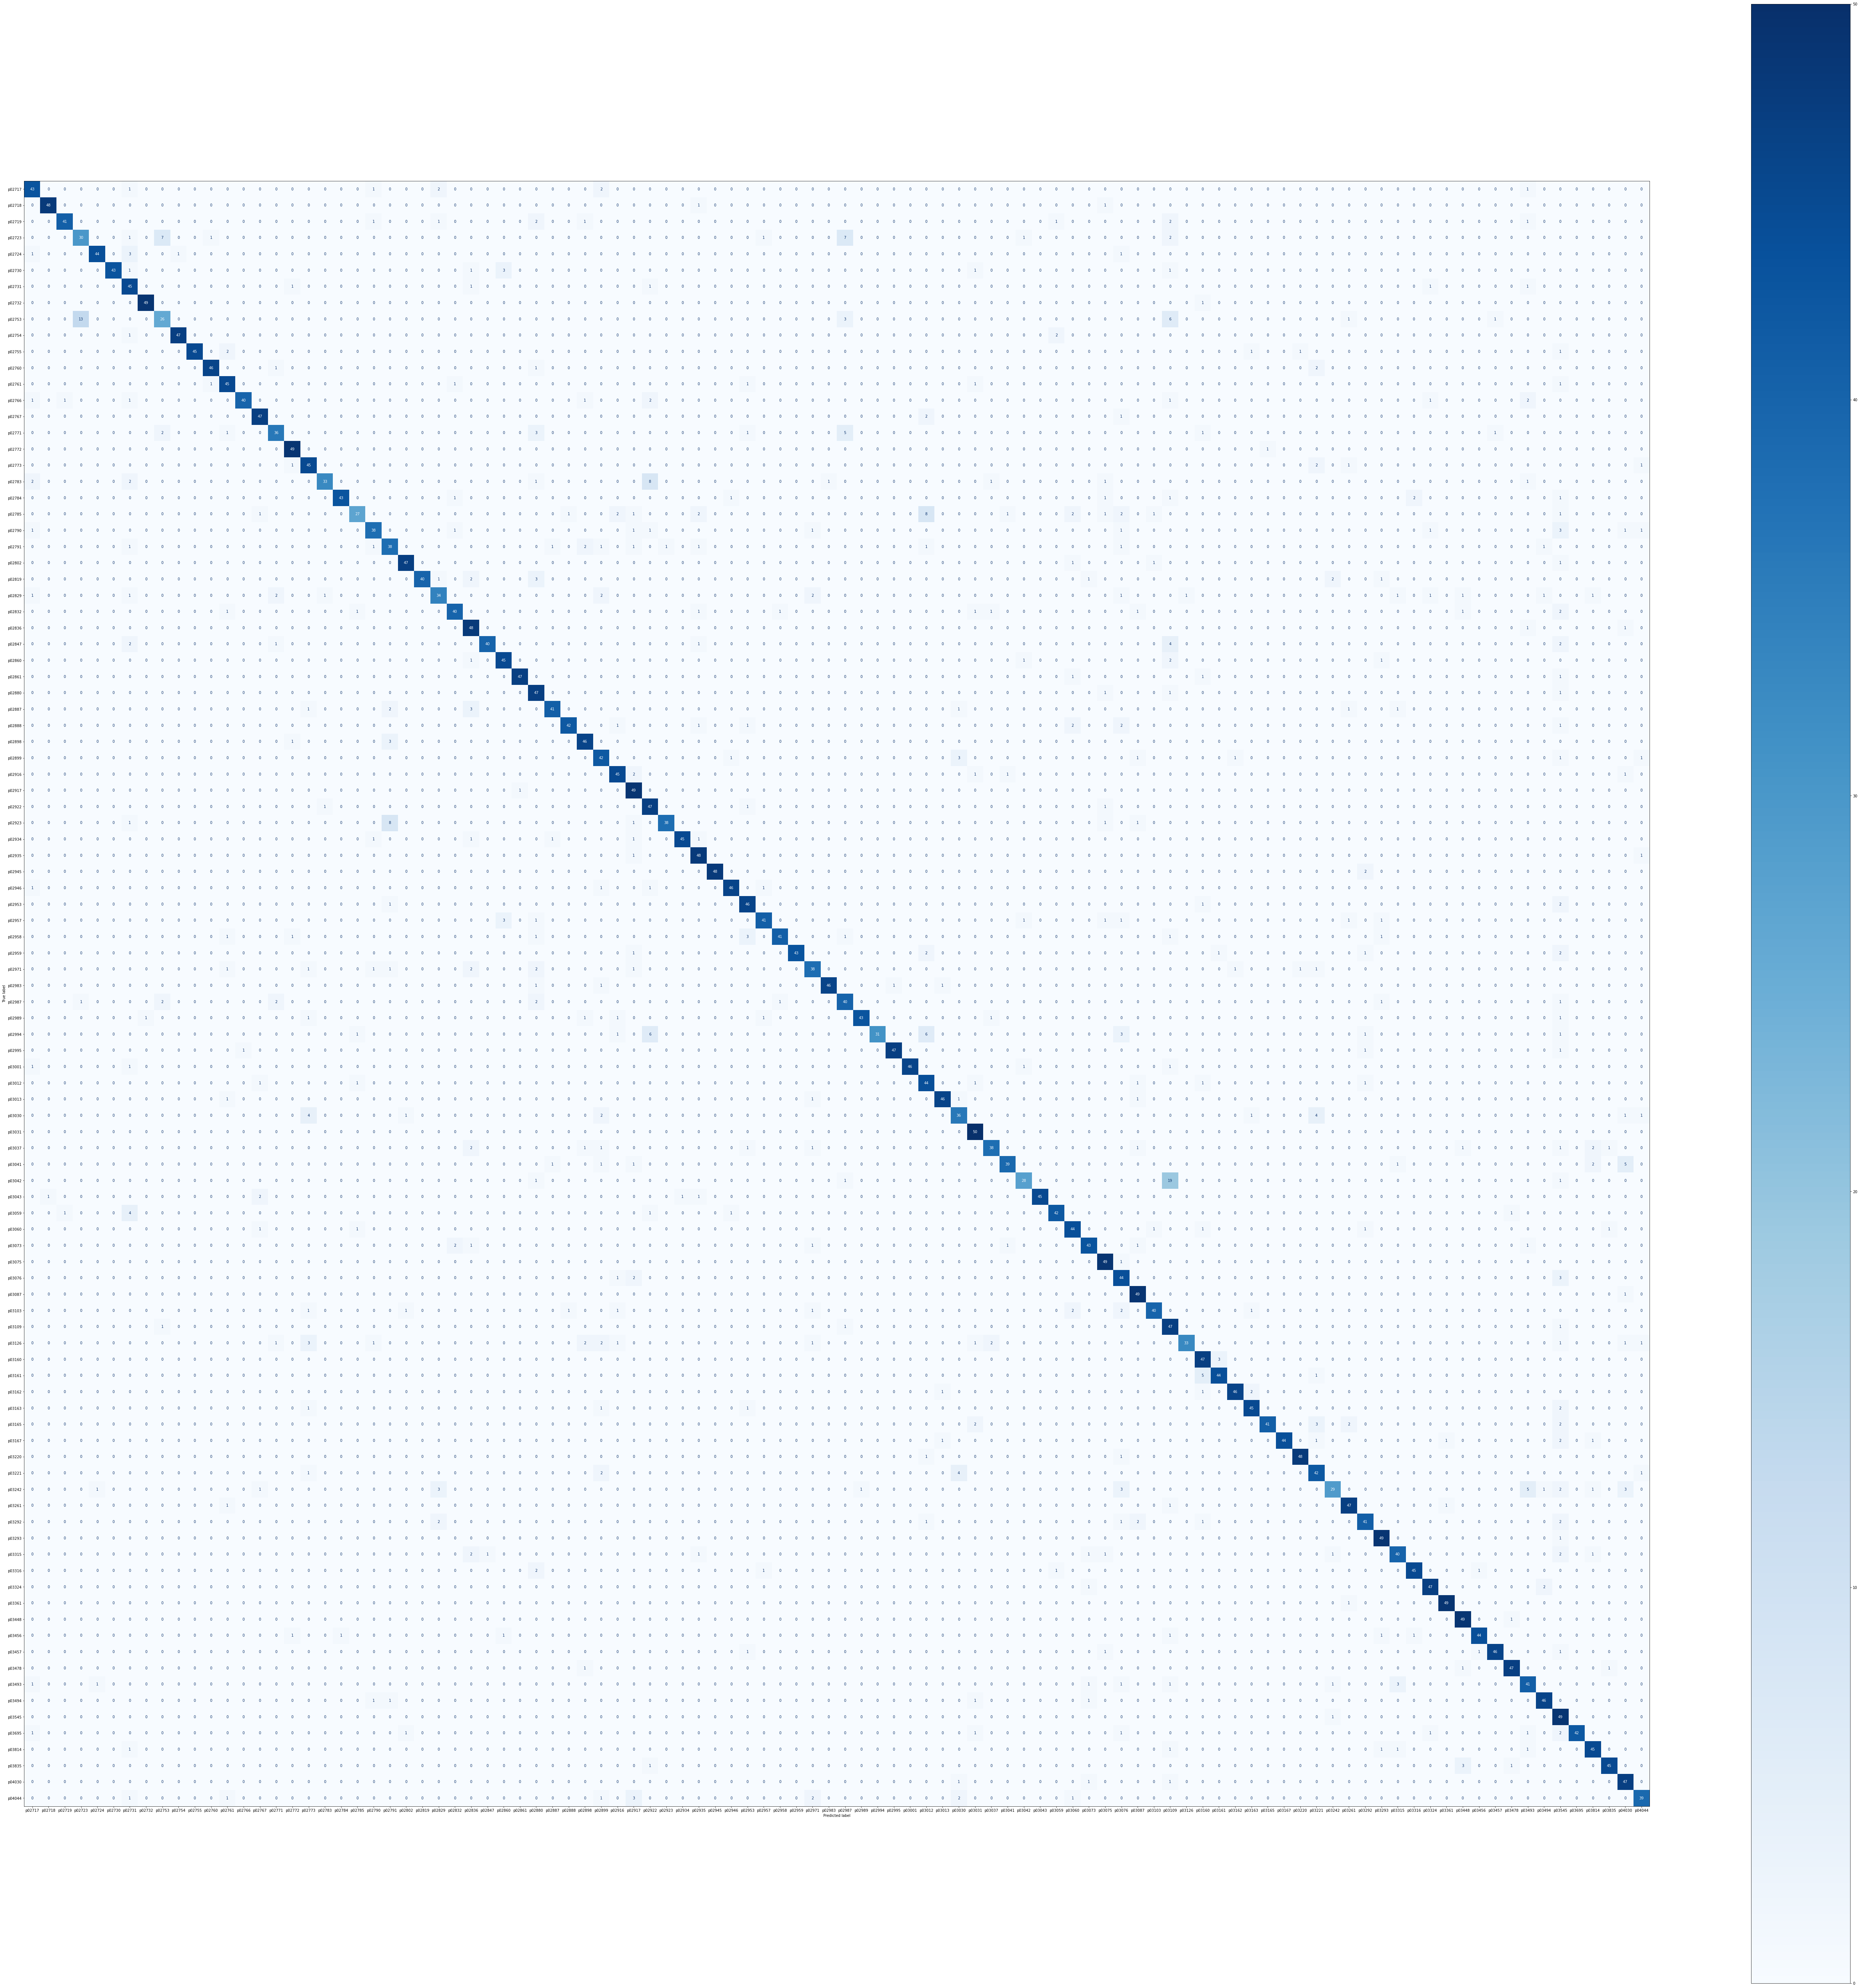

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(100, 100))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [9]:
from sklearn.metrics import classification_report

print(classification_report(expected_labels, predicted_labels, labels=labels))

              precision    recall  f1-score   support

      p02717       0.81      0.86      0.83        50
      p02718       0.98      0.96      0.97        50
      p02719       0.95      0.82      0.88        50
      p02723       0.68      0.60      0.64        50
      p02724       0.96      0.88      0.92        50
      p02730       1.00      0.86      0.92        50
      p02731       0.67      0.90      0.77        50
      p02732       0.98      0.98      0.98        50
      p02753       0.68      0.52      0.59        50
      p02754       0.98      0.94      0.96        50
      p02755       1.00      0.90      0.95        50
      p02760       0.96      0.92      0.94        50
      p02761       0.83      0.90      0.87        50
      p02766       0.98      0.80      0.88        50
      p02767       0.89      0.94      0.91        50
      p02771       0.84      0.72      0.77        50
      p02772       0.91      0.98      0.94        50
      p02773       0.78    

In [11]:
from collections import Counter
node_list = list(dataset.get_vocabulary_map())
overall_importance = {}
for test_item in test_generator:
    nodes, children = test_item[0]
    conv_filter_activations = model.conv_layer([nodes, children])
    node_importance = model.pooling_layer(conv_filter_activations)[0]
    node_importance_list = node_importance.numpy().tolist()[0]
    counter = Counter(node_importance_list)
    for node_id, value in counter.items():
        one_hot_node_type = nodes[0][node_id]
        node_type = node_list[argmax(one_hot_node_type)-1]
        if node_type in overall_importance:
            overall_importance[node_type] += value
        else:
            overall_importance[node_type] = value
    
overall_importance  

{'CompilationUnit': 1462821,
 'AssignExpr': 124219,
 'BinaryExpr': 586997,
 'MethodCallExpr': 166438,
 '+=': 6140,
 'BlockStmt': 158730,
 'ArrayType': 16685,
 'MethodDeclaration': 5196,
 'ArrayAccessExpr': 30364,
 'EnclosedExpr': 2869,
 'ForStmt': 20586,
 'VariableDeclarator': 41506,
 'UnaryExpr': 42666,
 'ArrayCreationLevel': 16474,
 'ObjectCreationExpr': 14273,
 '-': 8317,
 'ArrayCreationExpr': 15245,
 'Parameter': 5897,
 '<': 6514,
 'Name': 8078,
 'ExpressionStmt': 13632,
 'SimpleName': 5684,
 'ImportDeclaration': 3667,
 'NameExpr': 3179,
 'VoidType': 4200,
 'CastExpr': 8665,
 '*': 6883,
 'IfStmt': 54882,
 '==': 7453,
 '<=': 6406,
 'VariableDeclarationExpr': 1174,
 'ConstructorDeclaration': 2643,
 'WhileStmt': 8968,
 'ForEachStmt': 4225,
 'ThrowStmt': 403,
 '>': 1939,
 'ClassOrInterfaceDeclaration': 4860,
 'TryStmt': 1708,
 '--': 2111,
 '+': 2161,
 'NullLiteralExpr': 679,
 'StringLiteralExpr': 16022,
 '||': 887,
 'FieldDeclaration': 727,
 '>=': 4839,
 '&&': 1023,
 'BooleanLiteralExp

In [12]:
for w in sorted(overall_importance, key=overall_importance.get, reverse=True):
    print(w, overall_importance[w])

CompilationUnit 1462821
BinaryExpr 586997
MethodCallExpr 166438
BlockStmt 158730
AssignExpr 124219
IfStmt 54882
UnaryExpr 42666
VariableDeclarator 41506
ArrayAccessExpr 30364
ForStmt 20586
ConditionalExpr 18730
ArrayType 16685
ArrayCreationLevel 16474
StringLiteralExpr 16022
ArrayCreationExpr 15245
ObjectCreationExpr 14273
ExpressionStmt 13632
WhileStmt 8968
CastExpr 8665
- 8317
ClassOrInterfaceType 8130
Name 8078
== 7453
CharLiteralExpr 7315
* 6883
< 6514
% 6474
<= 6406
ArrayInitializerExpr 6347
+= 6140
!= 6015
Parameter 5897
SimpleName 5684
/ 5391
MethodDeclaration 5196
ClassOrInterfaceDeclaration 4860
>= 4839
ForEachStmt 4225
VoidType 4200
ReturnStmt 4120
ImportDeclaration 3667
NameExpr 3179
DoubleLiteralExpr 2903
EnclosedExpr 2869
BreakStmt 2831
LambdaExpr 2745
ConstructorDeclaration 2643
+ 2161
-- 2111
-= 2024
> 1939
SwitchStmt 1918
/= 1837
BooleanLiteralExpr 1773
TryStmt 1708
FieldAccessExpr 1606
SwitchEntry 1434
UnknownType 1255
DoStmt 1188
*= 1183
VariableDeclarationExpr 1174
&

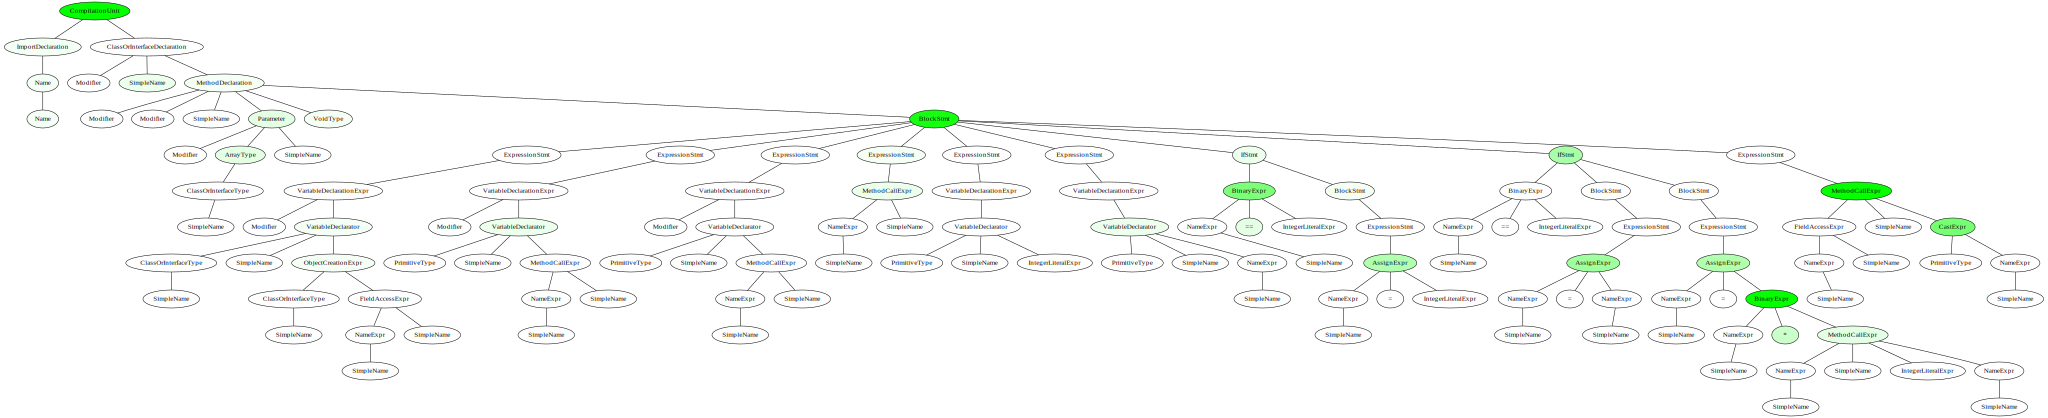

In [13]:
from collections import Counter
from visualization.GraphvizVisualizer import GraphvizVisualizer
sample_id = 1
nodes, children = test_generator.__getitem__(sample_id)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
import pickle
with open(test_files[sample_id], 'rb') as f:
    test_sample_ast = pickle.load(f)
vis = GraphvizVisualizer()
vis.visualizeAst(test_sample_ast, counter)